In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [70]:
diabetes_file = 'drive/MyDrive/Colab Notebooks/data/diabetes.csv'

In [140]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

In [72]:
pd.set_option('display.max_columns', None)

In [98]:
df = pd.read_csv(diabetes_file, na_values=['?', None])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [73]:
df.head(n=20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,NaN,70,1,21,0,0,0,414,411,V45,7,NaN,NaN,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,NaN,73,0,12,0,0,0,428,492,250,8,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,NaN,68,2,28,0,0,0,398,427,38,8,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,InternalMedicine,33,3,18,0,0,0,434,198,486,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [69]:
!cat 'drive/MyDrive/Colab Notebooks/data/IDs_mapping.csv'

admission_type_id,description
1,Emergency
2,Urgent
3,Elective
4,Newborn
5,Not Available
6,NULL
7,Trauma Center
8,Not Mapped
,
discharge_disposition_id,description
1,Discharged to home
2,Discharged/transferred to another short term hospital
3,Discharged/transferred to SNF
4,Discharged/transferred to ICF
5,Discharged/transferred to another type of inpatient care institution
6,Discharged/transferred to home with home health service
7,Left AMA
8,Discharged/transferred to home under care of Home IV provider
9,Admitted as an inpatient to this hospital
10,Neonate discharged to another hospital for neonatal aftercare
11,Expired
12,Still patient or expected to return for outpatient services
13,Hospice / home
14,Hospice / medical facility
15,Discharged/transferred within this institution to Medicare approved swing bed
16,Discharged/transferred/referred another institution for outpatient services
17,Discharged/transferred/referred to this institution for outpatient services
18,NULL
19,"Expired at

In [58]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [49]:
# column_names = df.columns.to_list()
num_missing = df.isnull().sum()
shape = df.shape
num_rows = df.shape[0]
# num_cells = np.product(df.shape)

data = {
    # 'column_names': column_names, 
    'num_missing': num_missing, 
    'percent_missing (%)': [round(x,2) for x in num_missing/num_rows*100]
}

stats = pd.DataFrame(data)

In [50]:
stats[stats['num_missing'] != 0]

,num_missing,percent_missing (%)
race,2273,2.23
weight,98569,96.86
payer_code,40256,39.56
medical_specialty,49949,49.08
diag_1,21,0.02
diag_2,358,0.35
diag_3,1423,1.40
max_glu_serum,96420,94.75
A1Cresult,84748,83.28


In [56]:
#large_missing = ['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult']
large_missing = stats[stats['percent_missing (%)'] > 5].index.to_list()
print(large_missing)

['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult']


In [108]:
df = df.drop(large_missing, axis=1)

In [76]:
df.shape

(101766, 45)

In [9]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

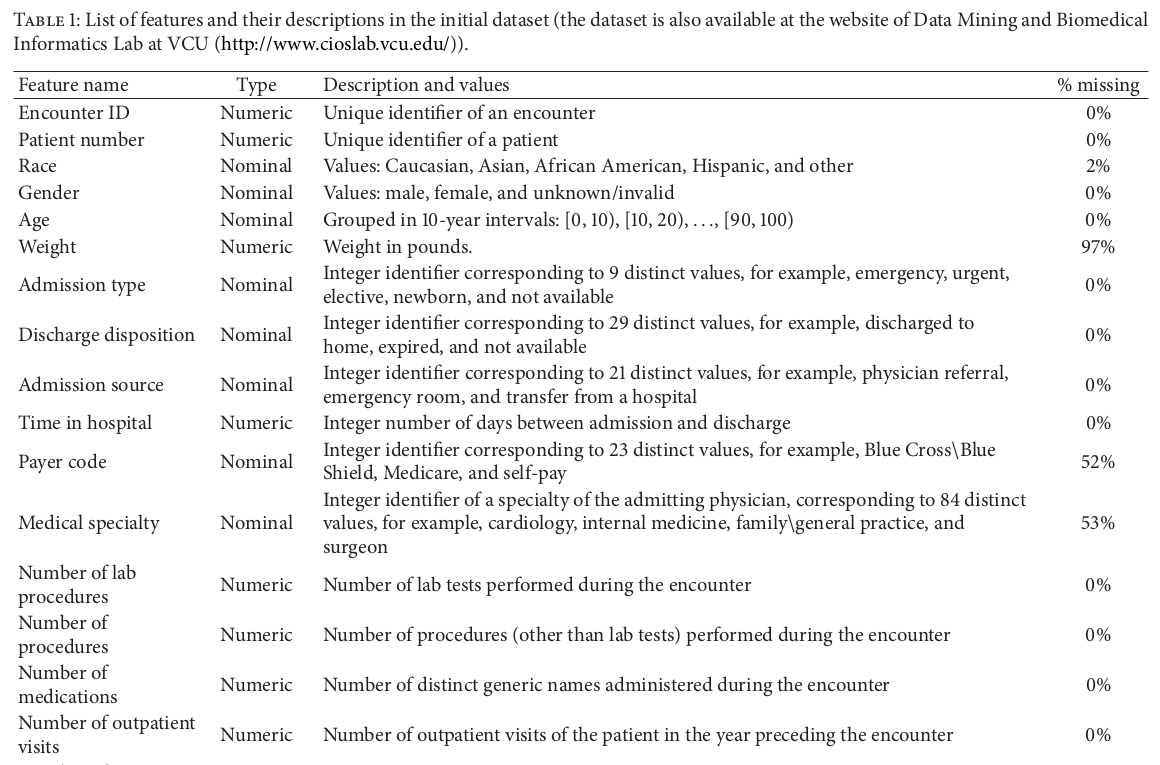

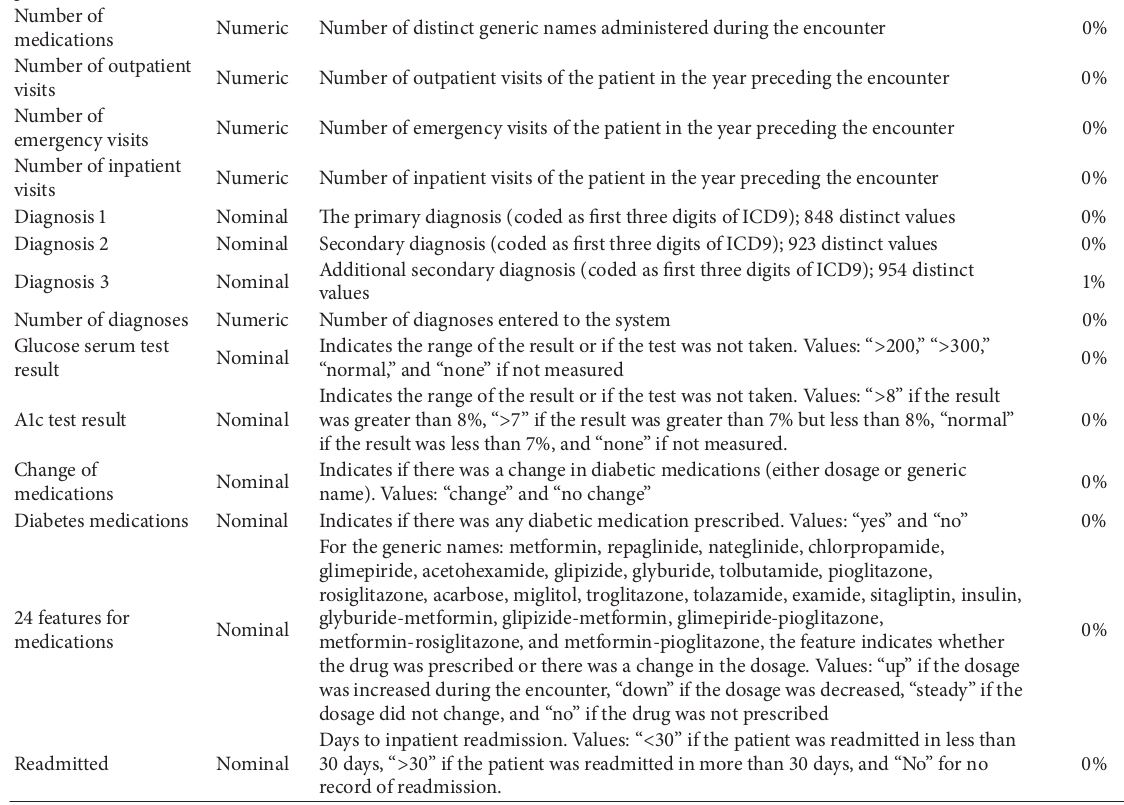

In [96]:
df['diag_1'].fillna(method='bfill', inplace=True)
df['diag_2'].fillna(method='bfill', inplace=True)
df['diag_3'].fillna(method='bfill', inplace=True)

In [90]:
print('diag_1 now missing: ', df['diag_1'].isnull().sum())
print('diag_2 now missing: ',df['diag_2'].isnull().sum())
print('diag_3 now missing: ',df['diag_3'].isnull().sum())

diag_1 now migging:  0
diag_2 now migging:  0
diag_3 now migging:  0


In [99]:
rows_before = df.shape[0]
print(rows_before)

101766


In [100]:
df = df[df['race'].notna()]

In [101]:
rows_after = df.shape[0]
print(rows_after)

99493


In [102]:
removed = rows_before - rows_after
print(removed)

2273


In [103]:
print('race now missing: ',df['race'].isnull().sum())

race now missing:  0


In [105]:
lb = LabelEncoder()

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99493 non-null  int64 
 1   patient_nbr               99493 non-null  int64 
 2   race                      99493 non-null  object
 3   gender                    99493 non-null  object
 4   age                       99493 non-null  object
 5   admission_type_id         99493 non-null  int64 
 6   discharge_disposition_id  99493 non-null  int64 
 7   admission_source_id       99493 non-null  int64 
 8   time_in_hospital          99493 non-null  int64 
 9   num_lab_procedures        99493 non-null  int64 
 10  num_procedures            99493 non-null  int64 
 11  num_medications           99493 non-null  int64 
 12  number_outpatient         99493 non-null  int64 
 13  number_emergency          99493 non-null  int64 
 14  number_inpatient     

In [126]:
medicines = df.columns.to_list()[19: 42]
# metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, 
# acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, 
# troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, 
# glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone

categorical_columns = ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'change', 'diabetesMed', 'readmitted'] + medicines

In [127]:
for col in categorical_columns:
  df[col] = lb.fit_transform(df[col])

In [128]:
df.head(n=10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,0,6,25,1,1,41,0,1,0,0,0,124,745,786,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,2
1,149190,55629189,2,0,1,1,1,7,3,59,0,18,0,0,0,143,78,121,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,1
2,64410,86047875,0,0,2,1,1,7,2,11,5,13,2,0,1,454,77,763,6,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,2
3,500364,82442376,2,1,3,1,1,7,2,44,1,16,0,0,0,553,96,248,7,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,2
4,16680,42519267,2,1,4,1,1,7,1,51,0,8,0,0,0,54,24,86,5,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,2
5,35754,82637451,2,1,5,2,1,2,3,31,6,16,0,0,0,263,245,86,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1,1
6,55842,84259809,2,1,6,3,1,2,4,70,1,21,0,0,0,263,245,767,7,2,1,1,1,2,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,2
7,63768,114882984,2,1,7,1,1,7,5,73,0,12,0,0,0,276,313,86,8,1,1,1,1,1,0,1,2,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,1
8,12522,48330783,2,0,8,2,1,4,13,68,2,28,0,0,0,252,259,229,8,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,2
9,15738,63555939,2,0,9,3,3,4,12,33,3,18,0,0,0,282,46,316,8,1,1,1,1,1,0,1,1,0,1,2,1,1,0,0,0,0,2,1,0,0,0,0,0,1,2


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   encounter_id              99493 non-null  int64
 1   patient_nbr               99493 non-null  int64
 2   race                      99493 non-null  int64
 3   gender                    99493 non-null  int64
 4   age                       99493 non-null  int64
 5   admission_type_id         99493 non-null  int64
 6   discharge_disposition_id  99493 non-null  int64
 7   admission_source_id       99493 non-null  int64
 8   time_in_hospital          99493 non-null  int64
 9   num_lab_procedures        99493 non-null  int64
 10  num_procedures            99493 non-null  int64
 11  num_medications           99493 non-null  int64
 12  number_outpatient         99493 non-null  int64
 13  number_emergency          99493 non-null  int64
 14  number_inpatient          99493 non-n

In [130]:
y = df['readmitted']
X = df.drop(columns=['readmitted'])

In [131]:
print(X.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


In [136]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            101756, 101757, 101758, 101759, 101760, 101761, 101762, 101763,
            101764, 101765],
           dtype='int64', length=99493)

In [141]:
scaler = StandardScaler()

In [138]:
tscv = TimeSeriesSplit()
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
for train_index, test_index in tscv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index[0]: train_index[-1]], X[test_index[0]: test_index[-1]]
  y_train, y_test = y[train_index[0]: train_index[-1]], y[test_index[0]: test_index[-1]]

TRAIN: [    0     1     2 ... 16580 16581 16582] TEST: [16583 16584 16585 ... 33162 33163 33164]
TRAIN: [    0     1     2 ... 33162 33163 33164] TEST: [33165 33166 33167 ... 49744 49745 49746]
TRAIN: [    0     1     2 ... 49744 49745 49746] TEST: [49747 49748 49749 ... 66326 66327 66328]
TRAIN: [    0     1     2 ... 66326 66327 66328] TEST: [66329 66330 66331 ... 82908 82909 82910]
TRAIN: [    0     1     2 ... 82908 82909 82910] TEST: [82911 82912 82913 ... 99490 99491 99492]
